# Generating a set of observation points

Notebook to open a dictionary with the properties of a set observation points and a topography for using in some test for Equivalent layer with positivity. 

#### Import libraries

In [1]:
%matplotlib inline
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime

from fatiando.utils import gaussian2d
from fatiando.gridder import regular

In [2]:
notebook_name = 'generating_grid.ipynb'

#### Importing auxiliary functions

In [3]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [4]:
import auxiliary_functions as func

#### List of saved files

In [5]:
saved_files = []

#### Loading MC data set

### Airborne survey

In [14]:
airborne_survey = dict()

In [15]:
airborne_survey['area'] = [-6500.,5500.,-5500.,6500.]
airborne_survey['Nx'],airborne_survey['Ny'] = 55, 32
airborne_survey['shape'] = (airborne_survey['Nx'],airborne_survey['Ny'])
airborne_survey['z_obs'] = -100.
airborne_survey['N'] = airborne_survey['Nx']*airborne_survey['Ny'] 

In [16]:
airborne_survey['x'],airborne_survey['y'],airborne_survey['z'] = regular(airborne_survey['area'],airborne_survey['shape'],airborne_survey['z_obs'])

#### Airborne survey spacing

In [17]:
airborne_survey['dx'] = (airborne_survey['area'][1] - airborne_survey['area'][0])/(airborne_survey['Nx']-1.)
airborne_survey['dy'] = (airborne_survey['area'][3] - airborne_survey['area'][2])/(airborne_survey['Ny']-1)

print 'dx = %.1f m' % airborne_survey['dx']

dx = 222.2 m


In [18]:
print 'dx = %.1f m' % airborne_survey['dx']
print 'dy = %.1f m' % airborne_survey['dy']
print 'Number of data : %.1f ' % airborne_survey['N']

dx = 222.2 m
dy = 387.1 m
Number of data : 1760.0 


#### Airborne survey visualization

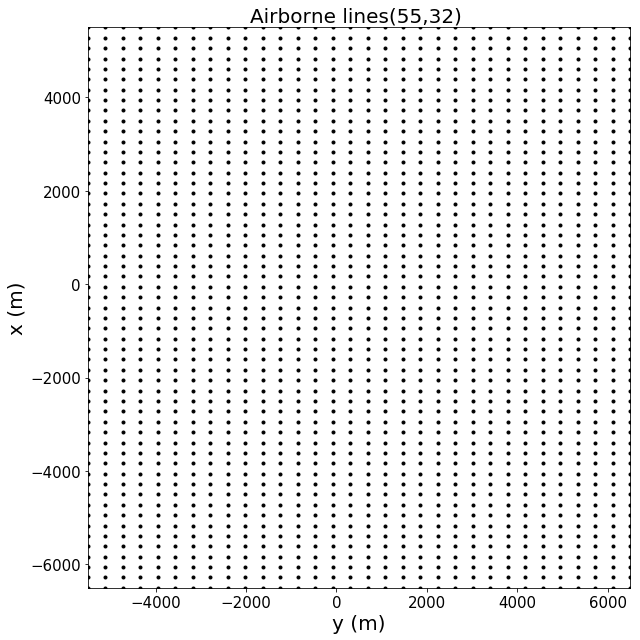

In [19]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.title('Airborne lines(%.0f,%.0f) ' % (airborne_survey['Nx'],airborne_survey['Ny']), fontsize=title_font)
plt.plot(airborne_survey['y'], airborne_survey['x'],'k.')
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.ylim(np.min(airborne_survey['x']),np.max(airborne_survey['x']))
plt.xlim(np.min(airborne_survey['y']),np.max(airborne_survey['y']))
plt.tick_params(labelsize=15)

file_name = 'figs/airborne/airborne_lines'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=400)
saved_files.append(file_name+'.eps')


plt.show()

#### Generating .pickle file

In [20]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
airborne_survey['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [21]:
file_name = 'data/airborne_survey.pickle'
with open(file_name, 'w') as f:
    pickle.dump(airborne_survey, f)
    
saved_files.append(file_name)


## Saved files

In [22]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/regular/grid_regular.png
2  figs/regular/grid_regular.eps
3  data/regular_grid.pickle
4  figs/airborne/airborne_lines.png
5  figs/airborne/airborne_lines.eps
6  data/airborne_survey.pickle
